<a href="https://colab.research.google.com/github/bangkitPk/capstone-project-data-science/blob/main/Capstone_Project_Cepat_Cakap_Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import uniform, randint

In [3]:
import warnings

In [4]:
from scipy.stats import shapiro

# Load Dataset

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/bangkitPk/capstone-project-data-science/main/garments_worker_productivity.csv')

# Data Understanding

In [6]:
df.shape

(1197, 15)

Dataset terdiri dari 1197 baris dan 15 kolom

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [81]:
df.describe()

,date,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.668338,0.735091
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437
std,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.243885,0.174488


Actual Productivity
1. Rata-rata produktivitas aktual adalah 0.735 yang berarti produktivitas aktual cenderung mendekati nilai ini.
2. Standar deviasi sebesar 0.174 (rendah) menunjukkan bahwa sebagian besar nilai produktivitas aktual berada dekat dengan rata-rata.
3. Nilai produktivitas aktual terendah dalam dataset adalah 0.233.
4. Median (0.773) yang sedikit lebih tinggi dari rata-rata (0.735) mengindikasikan bahwa distribusi produktivitas aktual mungkin sedikit skew ke kiri (negatif)

In [10]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [11]:
df.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


# EDA & Data Preprocessing

In [12]:
# ubah nama kolom wip dan smv
df = df.rename(columns={'wip': 'work_in_progress', 'smv':'std_minute_value'})

In [13]:
# split kolom kategorik dan numerik
cat_columns = ["quarter", "department", "day", "team"] # 4 kolom
num_columns = ["targeted_productivity", "std_minute_value", "work_in_progress", "over_time", "idle_men", "incentive", "idle_time", "no_of_style_change", "no_of_workers", "actual_productivity"]
# 10 kolom

## Check duplicate rows

In [14]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 15)


**Tidak ada baris duplikat**

## Handling Missing Value

In [15]:
print(df.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
std_minute_value           0
work_in_progress         506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


Terdapat 506 baris dengan nilai work_in_progress yang bernilai null (sekitar 42% dari total baris).

Kolom ini akan dihapus sebelum pemodelan, namun terlebih dulu akan digunakan untuk melihat korelasinya dengan 'actual_productivity'

## Handling Anomali Data

In [16]:
# cek anomali pada kolom kategorik
for column in cat_columns:
  print(column)
  print(df[column].unique())
  print('\n')

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department
['sweing' 'finishing ' 'finishing']


day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


team
[ 8  1 11 12  6  7  2  3  9 10  5  4]




In [17]:
# terdapat dua departemen finishing karena ada spasi di akhir salah satu kata finishing
# Hapus spasi pada kata "finishing " di kolom department
df['department'] = df['department'].str.strip()

In [18]:
# perbaiki penulisan departemen sewing

df['department'] = df['department'].replace({'sweing': 'sewing'})

In [19]:
# cek perbaikan
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [20]:
# Mengidentifikasi nilai negatif dalam kolom numerik
for column in num_columns:
  print(f"{column} {len(df[df[column] < 0])}")

# Tidak ada nilai negatif

targeted_productivity 0
std_minute_value 0
work_in_progress 0
over_time 0
idle_men 0
incentive 0
idle_time 0
no_of_style_change 0
no_of_workers 0
actual_productivity 0


In [21]:
# no_of_workers bukan bilangan bulat
df[df['no_of_workers'] % 1 != 0]

# seharusnya jumlah pekerja dalam bilangan bulat

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
7,1/1/2015,Quarter1,sewing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
9,1/1/2015,Quarter1,sewing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
10,1/1/2015,Quarter1,sewing,Thursday,9,0.70,28.08,872.0,6900,44,0.0,0,0,57.5,0.721127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2/15/2015,Quarter3,sewing,Sunday,5,0.80,30.10,679.0,7140,0,0.0,0,0,59.5,0.722569
780,2/15/2015,Quarter3,sewing,Sunday,4,0.75,30.10,919.0,7140,0,0.0,0,1,59.5,0.598627
782,2/15/2015,Quarter3,sewing,Sunday,2,0.80,22.52,12.0,6900,0,0.0,0,0,57.5,0.432123
847,2/19/2015,Quarter3,sewing,Thursday,4,0.80,30.10,859.0,7020,63,0.0,0,1,58.5,0.800094


In [22]:
# Membulatkan nilai ke atas
df['no_of_workers'] = np.ceil(df['no_of_workers'])

# Mengubah tipe data kolom menjadi integer
df['no_of_workers'] = df['no_of_workers'].astype(int)

In [23]:
# cek perbaikan
df['no_of_workers'].unique()

array([59,  8, 31, 56, 58, 55, 54, 18, 60, 12, 20, 17, 57, 30, 32, 10, 16,
       15,  5, 53, 52,  2,  9,  7, 19, 28, 34, 89, 14, 25,  4, 21, 35, 51,
       33, 11, 22, 26, 27, 50, 44, 49, 47, 48, 42, 24, 45, 46, 39, 38,  6])

Karena kolom tersebut menggambarkan jumlah pekerja, yang secara alami adalah bilangan bulat, membulatkan ke atas memastikan bahwa jumlah pekerja tidak kurang dari yang tercatat

In [24]:
# ubah tipe data kolom date menjadi datetime

df['date'] = pd.to_datetime(df['date'])

In [25]:
# cek perbaikan
df.head()

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,31,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,31,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


In [26]:
# terdapat nilai actual_productivity yang lebih dari 1
# seharusnya nilai dalam rentang 0- 1
count_greater_than_1 = df[df['actual_productivity'] > 1].shape[0]

print("Jumlah baris dengan nilai actual_productivity lebih dari 1:", count_greater_than_1)

Jumlah baris dengan nilai actual_productivity lebih dari 1: 37


In [27]:
# Buang baris yang memiliki nilai actual_productivity lebih dari 1
df_cleaned = df[df['actual_productivity'] <= 1]

Jumlah nilai produktivitas yang melebihi 1 sangat sedikit (3% dari total baris), maka baris yang memiliki nilai actual_productivity lebih dari 1 dapat dibuang

## Cek Imbalance pada Variabel Target

In [28]:
df_with_target = df_cleaned.copy()

# Menambahkan kolom is_achieved_target
# untuk melabel actual_productivity yang mencapai targeted_productivity
df_with_target['is_achieved_target'] = df_with_target['actual_productivity'] >= df_with_target['targeted_productivity']

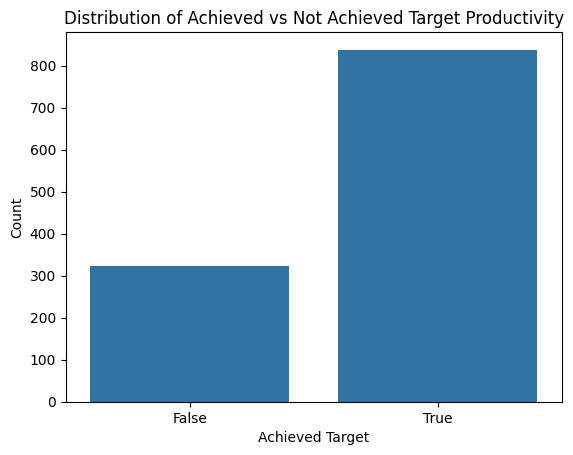

In [29]:
# Visualisasi distribusi kolom is_achieved_target
sns.countplot(x='is_achieved_target', data=df_with_target)
plt.title('Distribution of Achieved vs Not Achieved Target Productivity')
plt.xlabel('Achieved Target')
plt.ylabel('Count')
plt.show()

In [30]:
# Menghitung persentase kolom is_achieved_target
achievement_counts = df_with_target['is_achieved_target'].value_counts(normalize=True) * 100
print(achievement_counts)

is_achieved_target
True     72.241379
False    27.758621
Name: proportion, dtype: float64



Mayoritas (72,24%) kasus memenuhi atau melampaui produktivitas yang ditargetkan. Ini merupakan tanda positif yang menunjukkan bahwa sebagian besar pekerja atau tim berkinerja pada atau di atas tingkat yang diharapkan.

## Cek Distribusi Kolom

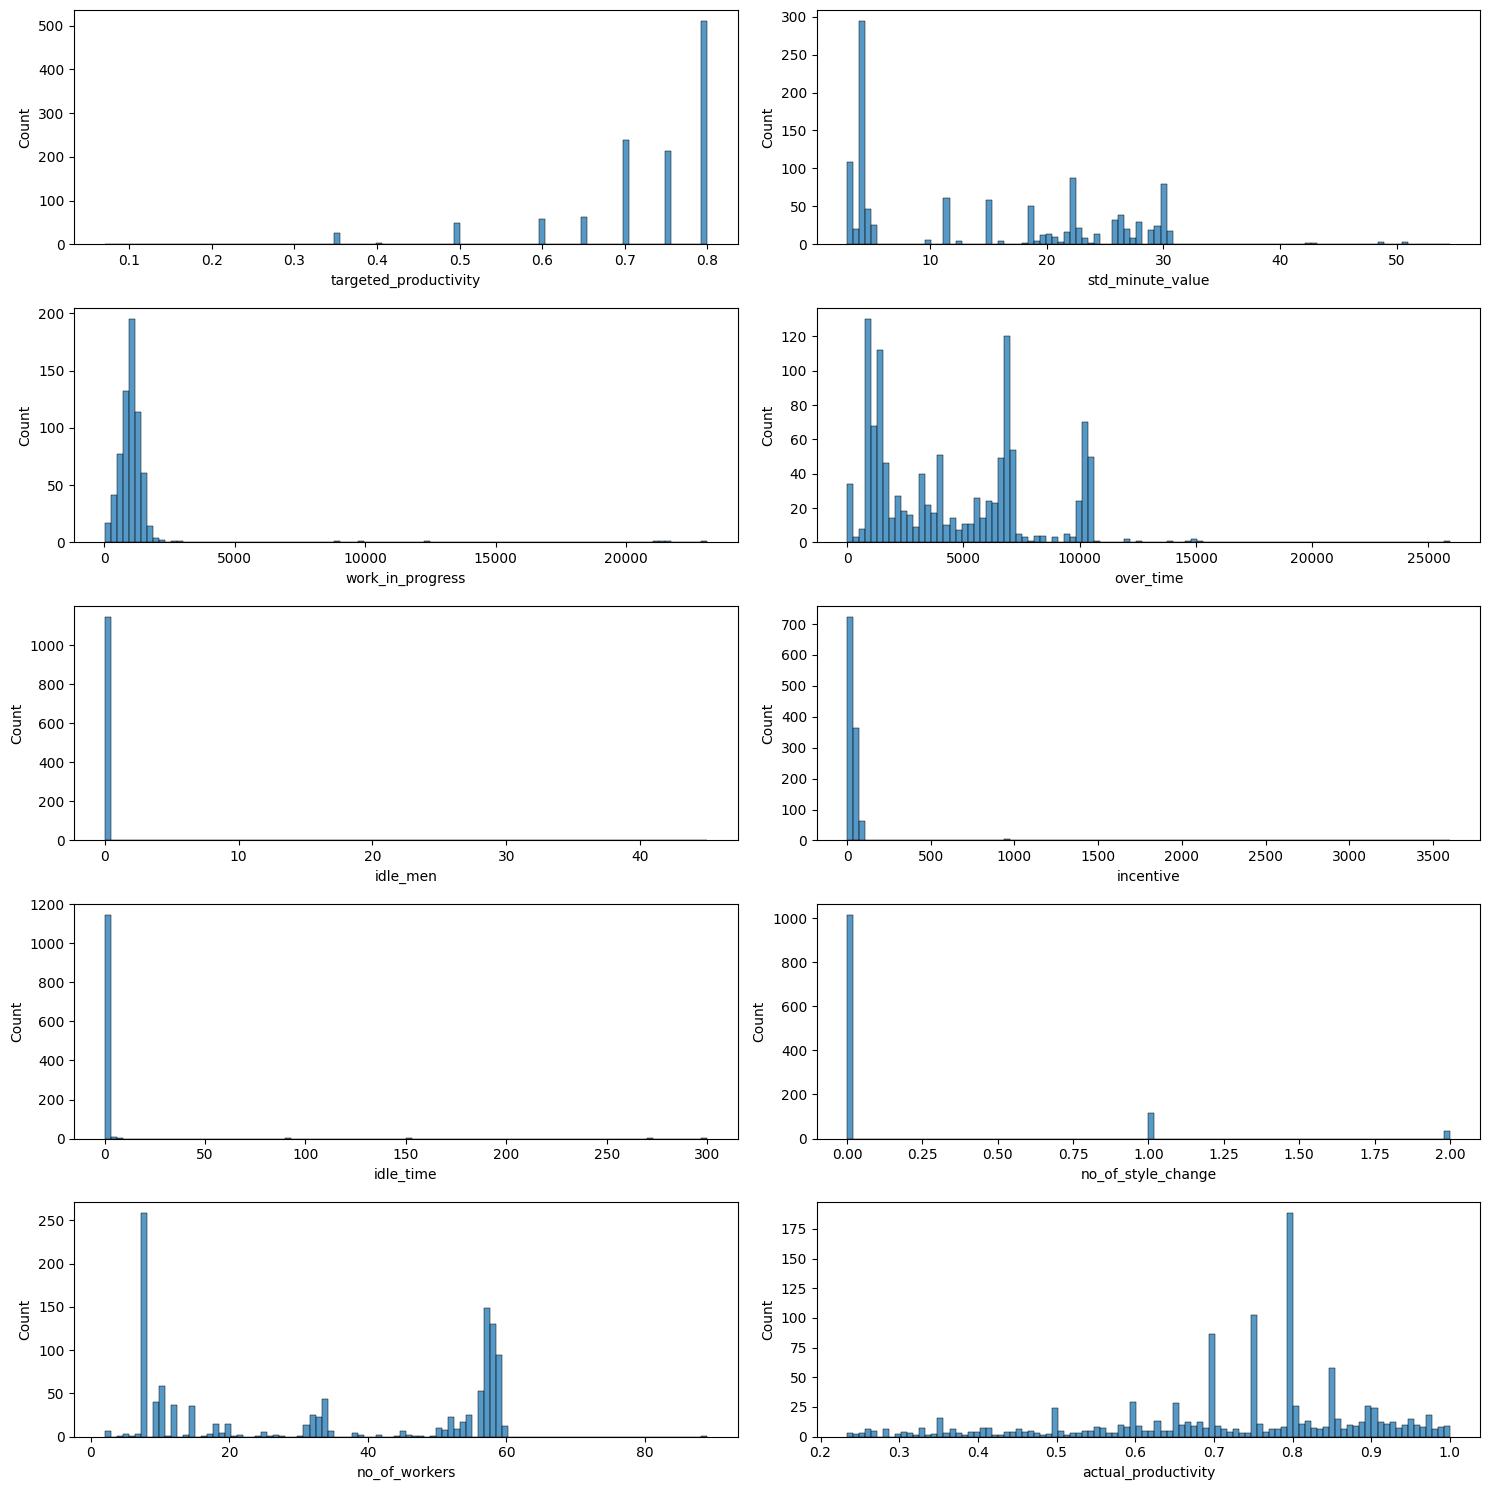

In [31]:
# Cek distribusi variabel numerik dengan histplot
fig, axes = plt.subplots(5, 2, figsize=(15, 15))

for i, col in enumerate(num_columns):
    row_index = i // 2
    col_index = i % 2
    sns.histplot(df_cleaned[col], ax=axes[row_index, col_index], bins=100)

plt.tight_layout()
plt.show()

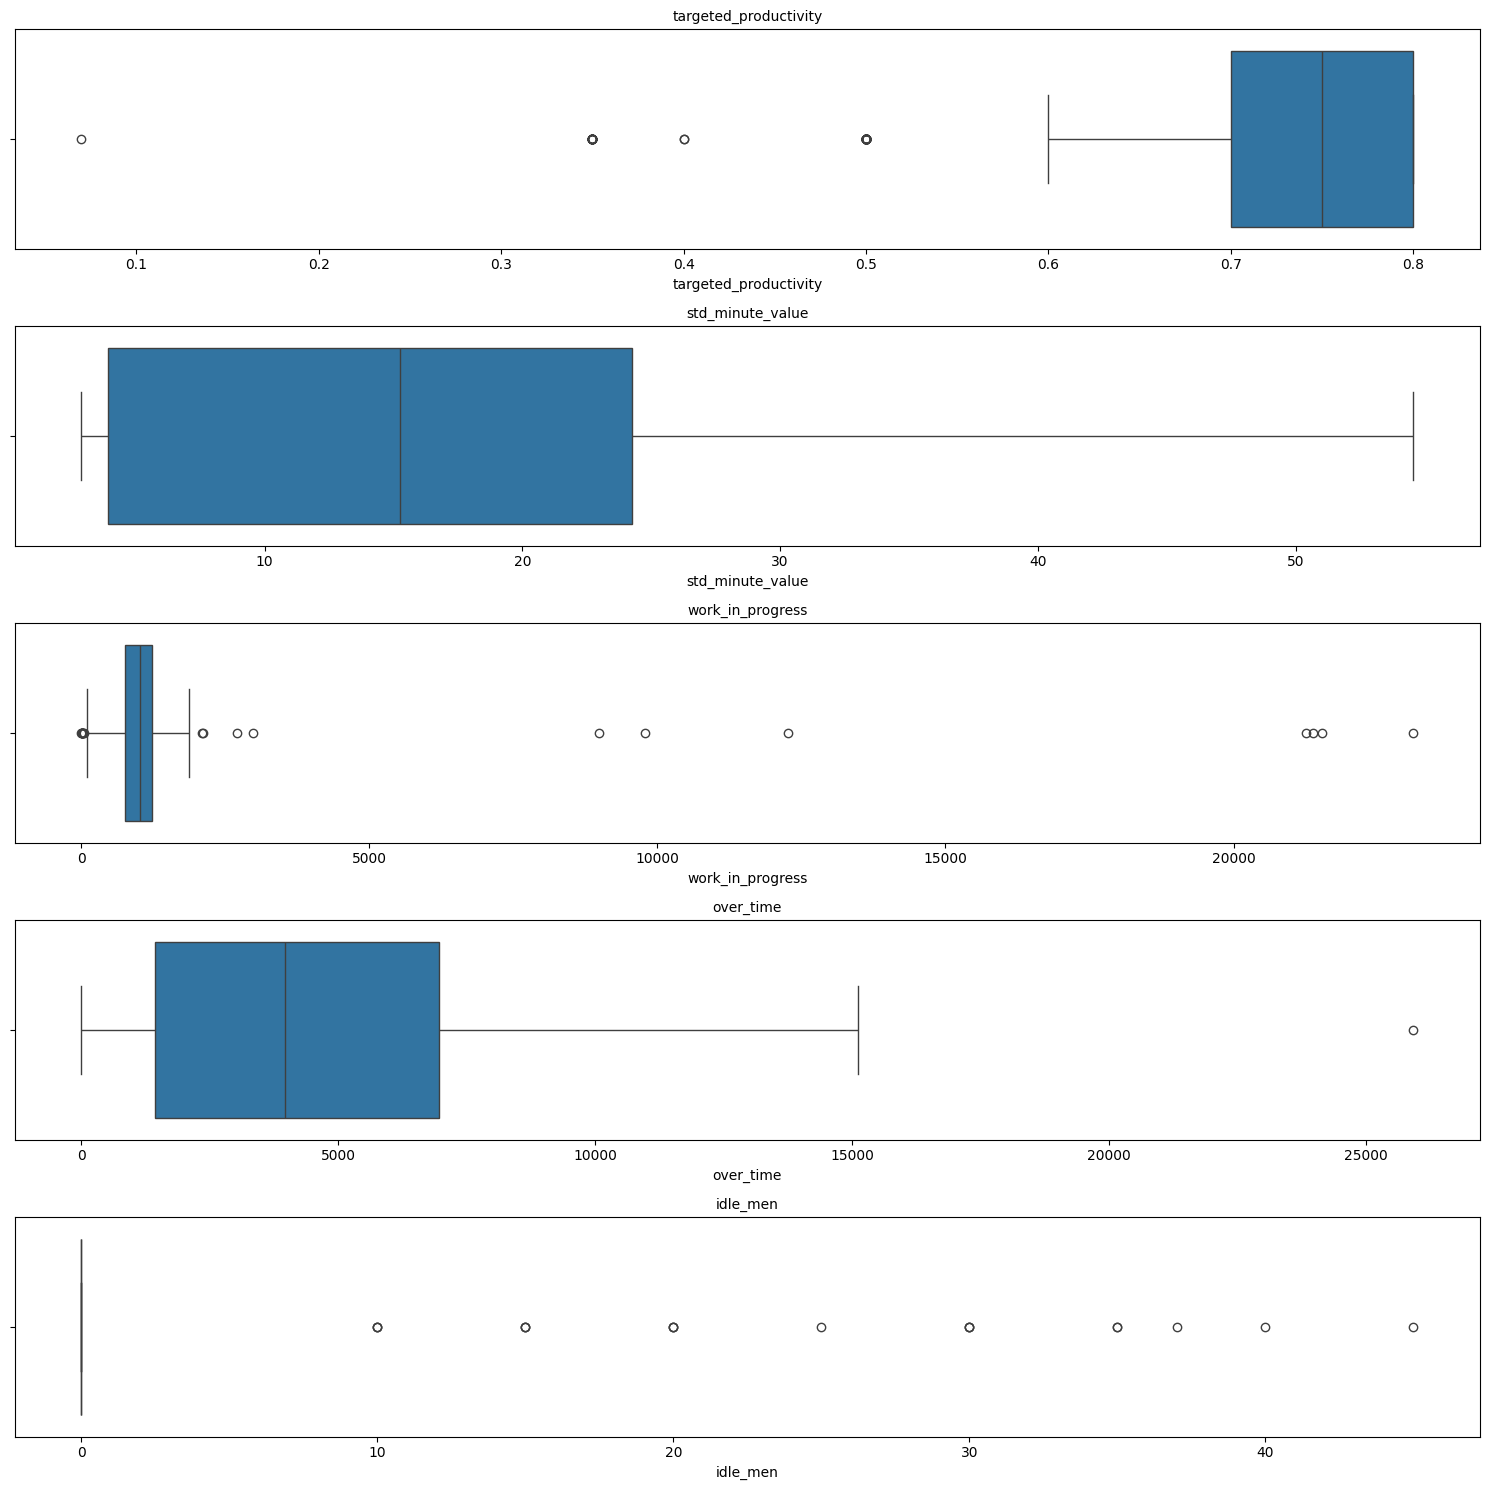

In [32]:
# Memisahkan kolom menjadi dua grup
num_columns_first_half = num_columns[:5]
num_columns_second_half = num_columns[5:]

# Boxplot untuk 5 kolom pertama
fig, axes = plt.subplots(5, 1, figsize=(15, 15))
for i, col in enumerate(num_columns_first_half):
    sns.boxplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)

plt.tight_layout()
plt.show()

1. Targeted Productivity: Nilai banyak berada di rentang 0.7 hingga 0.8, target produktivitas yang ditetapkan relatif tinggi.
2. Standard Minute Value: Mayoritas nilai berkisar antara 0 hingga 20, dengan nilai maksimum lebih dari 50.
3. Work In Progress: Sebagian besar nilai berada di bawah 2000. Ada banyak outlier di bagian atas, mengindikasikan beberapa titik data yang sangat tinggi dibandingkan mayoritas.
4. Overtime: Sebagian besar nilai berada di bawah 10000, namun ada outliers di bagian atas, menunjukkan beberapa titik data yang sangat tinggi.
5. Idle Men: Sebagian besar baris tidak memiliki pekerja yang menganggur, namun ada beberapa baris dengan jumlah pekerja yang menganggur cukup tinggi.


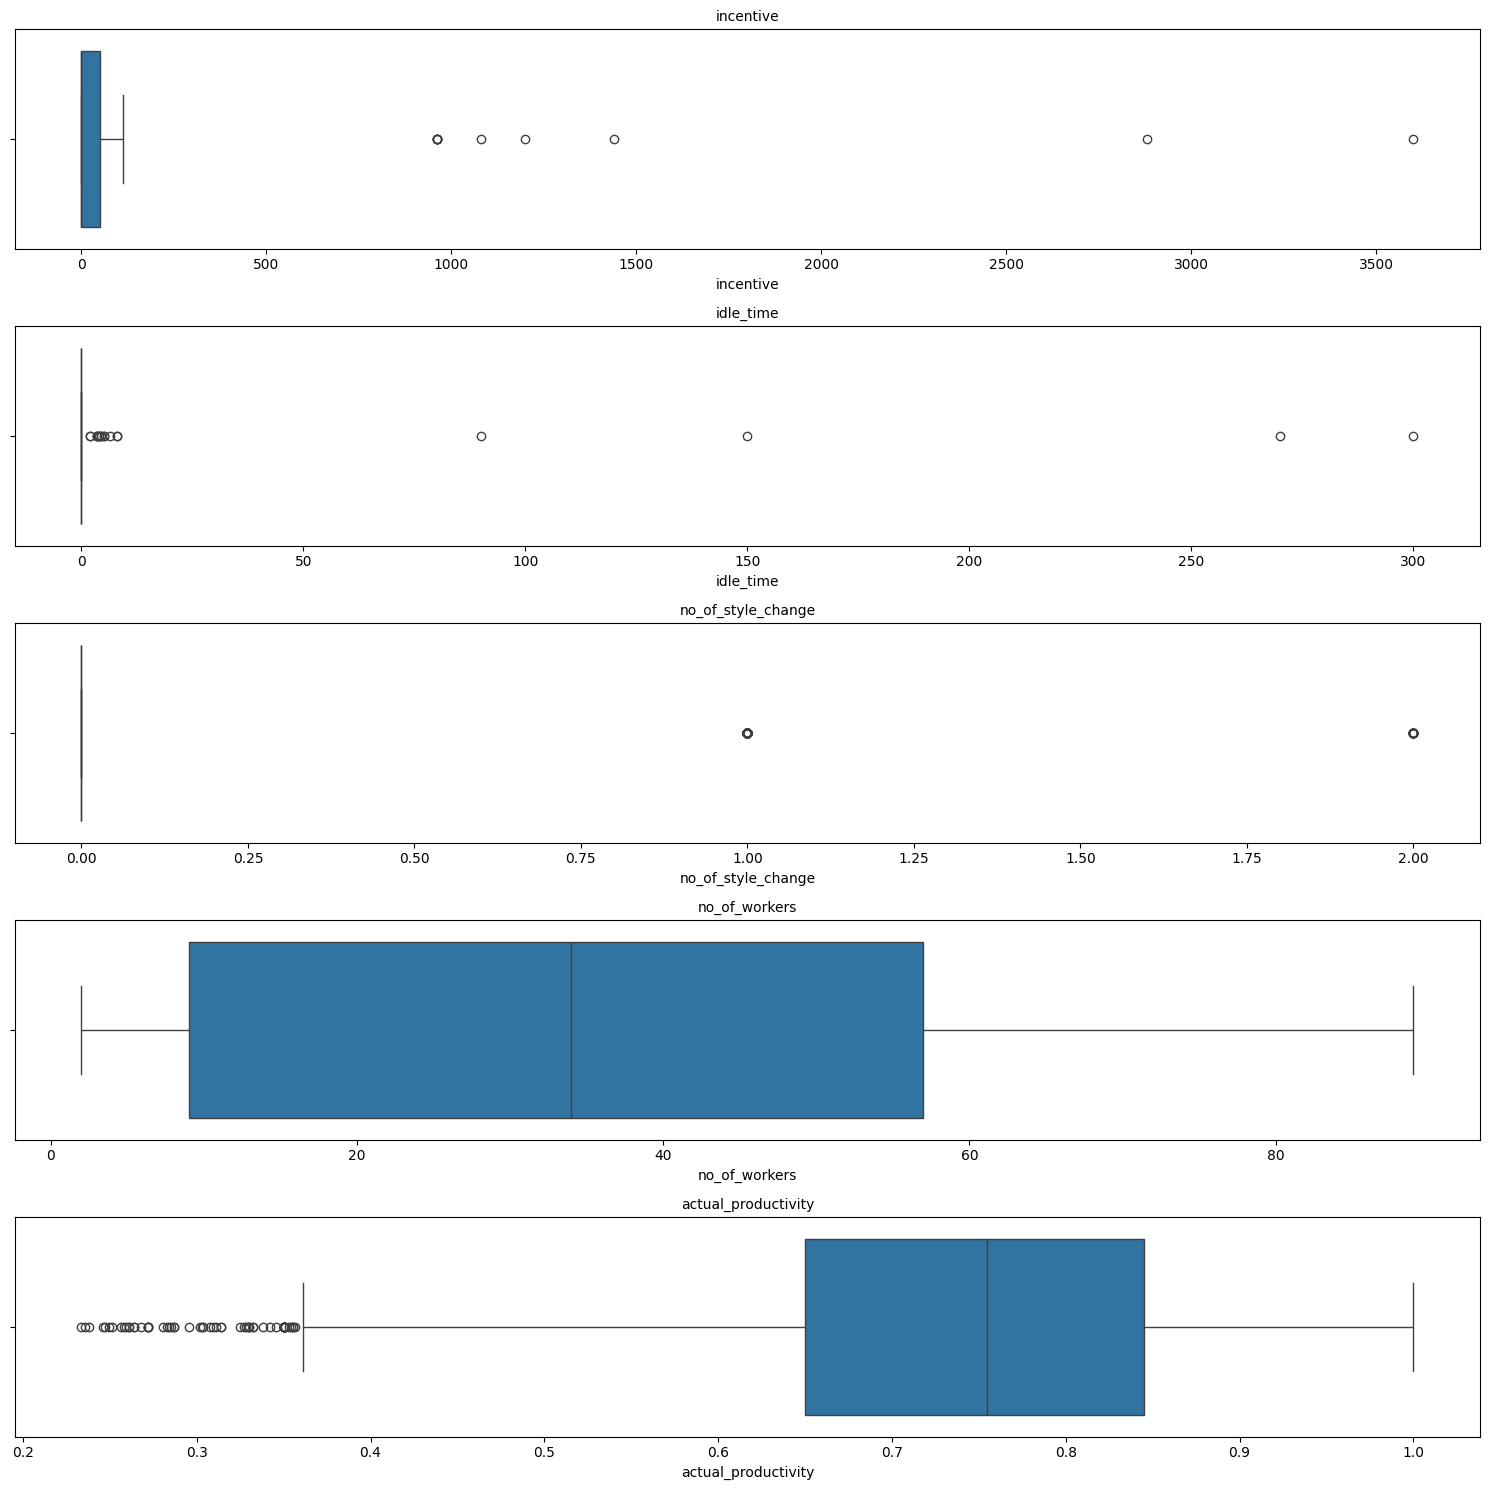

In [33]:
# Boxplot untuk 5 kolom kedua
fig, axes = plt.subplots(5, 1, figsize=(15, 15))
for i, col in enumerate(num_columns_second_half):
    sns.boxplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)

plt.tight_layout()
plt.show()

6. Sebagian besar baris tidak memiliki insentif, namun ada beberapa baris dengan insentif yang sangat tinggi.
7. Idle Time: Sebagian besar idle time adalah nol, namun ada beberapa baris yang menunjukkan idle time yang sangat tinggi.
8. No of Style Change: Sebagian besar baris tidak mengalami perubahan desain produk, namun ada beberapa baris dengan satu atau dua perubahan desain.
9. No of Workers: Jumlah pekerja bervariasi, dengan mayoritas berada di bawah 60. Namun, ada beberapa baris dengan jumlah pekerja yang jauh lebih banyak.
10. Actual Productivity: Actual productivity sebagian besar berkisar antara 0.65 dan 0.85, dengan beberapa outlier di bawah. Hal ini menunjukkan bahwa mayoritas produktivitas aktual bernilai tinggi, namun ada beberapa baris dengan produktivitas yang sangat rendah.

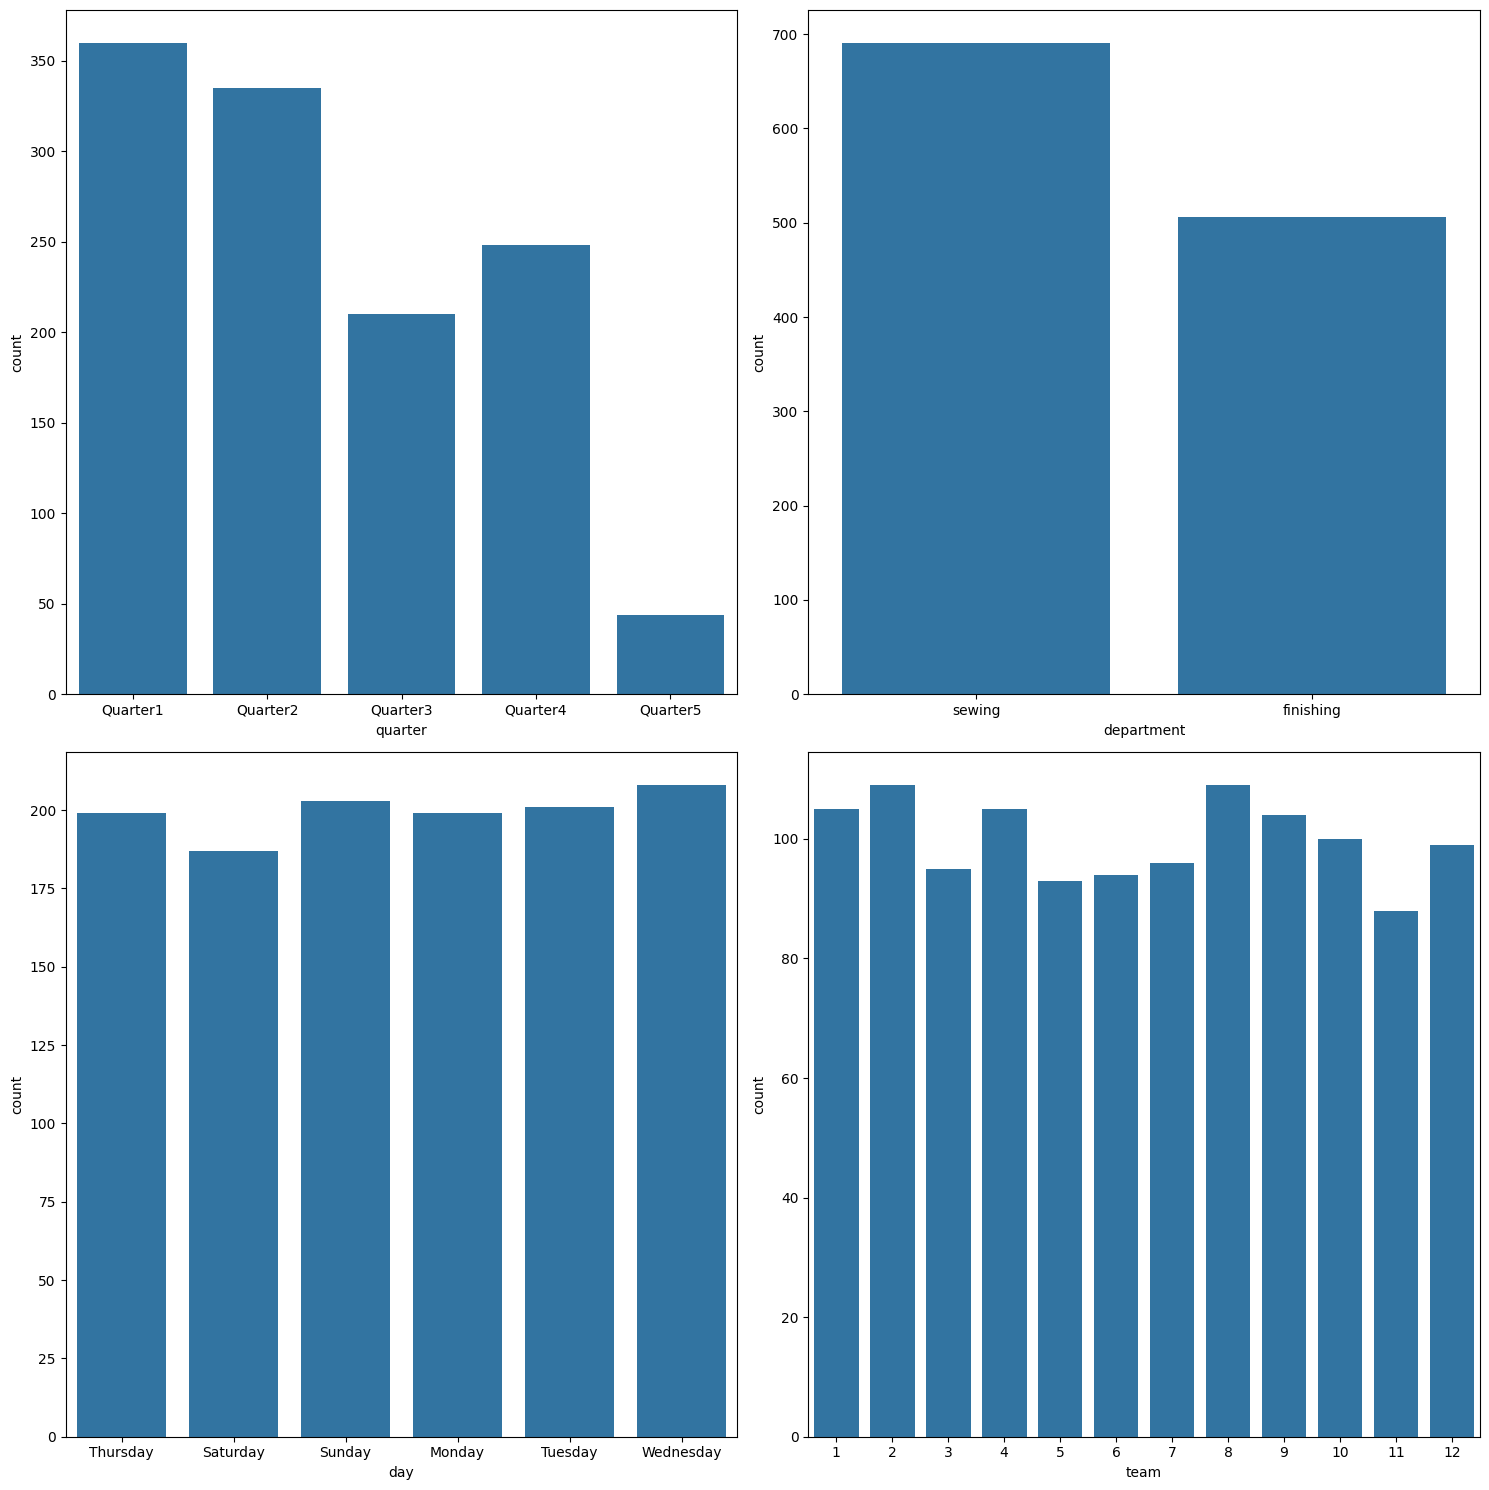

In [34]:
# Cek distribusi variabel kategorik dengan countplot
num_rows = len(cat_columns) // 2 + len(cat_columns) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, col in enumerate(cat_columns):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.countplot(x=df[col], ax=axes[row_index, col_index])

plt.tight_layout()
plt.show()

# Cek Hubungan Antar Variabel

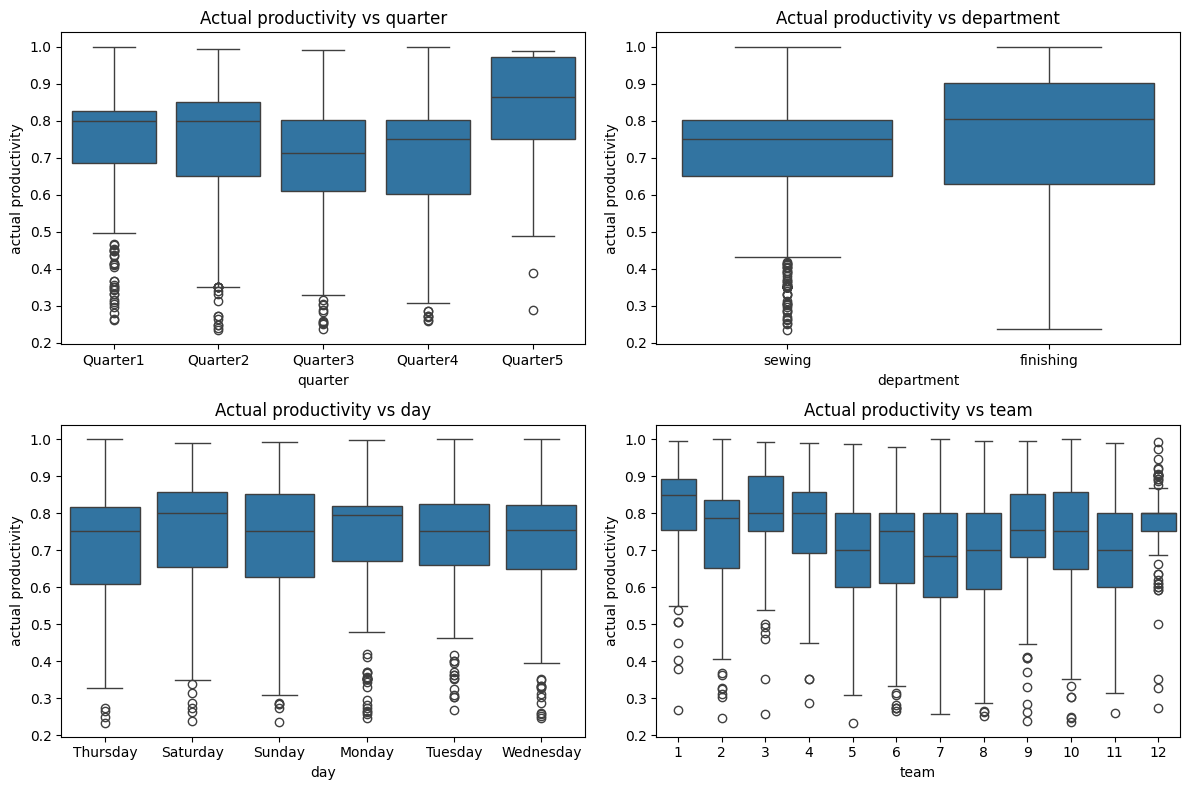

In [35]:
# Hubungan variabel kategorik dan variabel target
fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

for i, ax in enumerate(axes.ravel()):
    sns.boxplot(data=df_cleaned, x=cat_columns[i], y='actual_productivity', ax=ax)
    ax.set_title(f"Actual productivity vs {cat_columns[i]}")
    ax.set_xlabel(cat_columns[i])
    ax.set_ylabel("actual productivity")

fig.tight_layout()
plt.show()

actual_productivity memiliki median tertinggi pada:

1. Quarter 5
2. Departemen finishing
3. Hari Sabtu (Saturday)
4. Tim 1

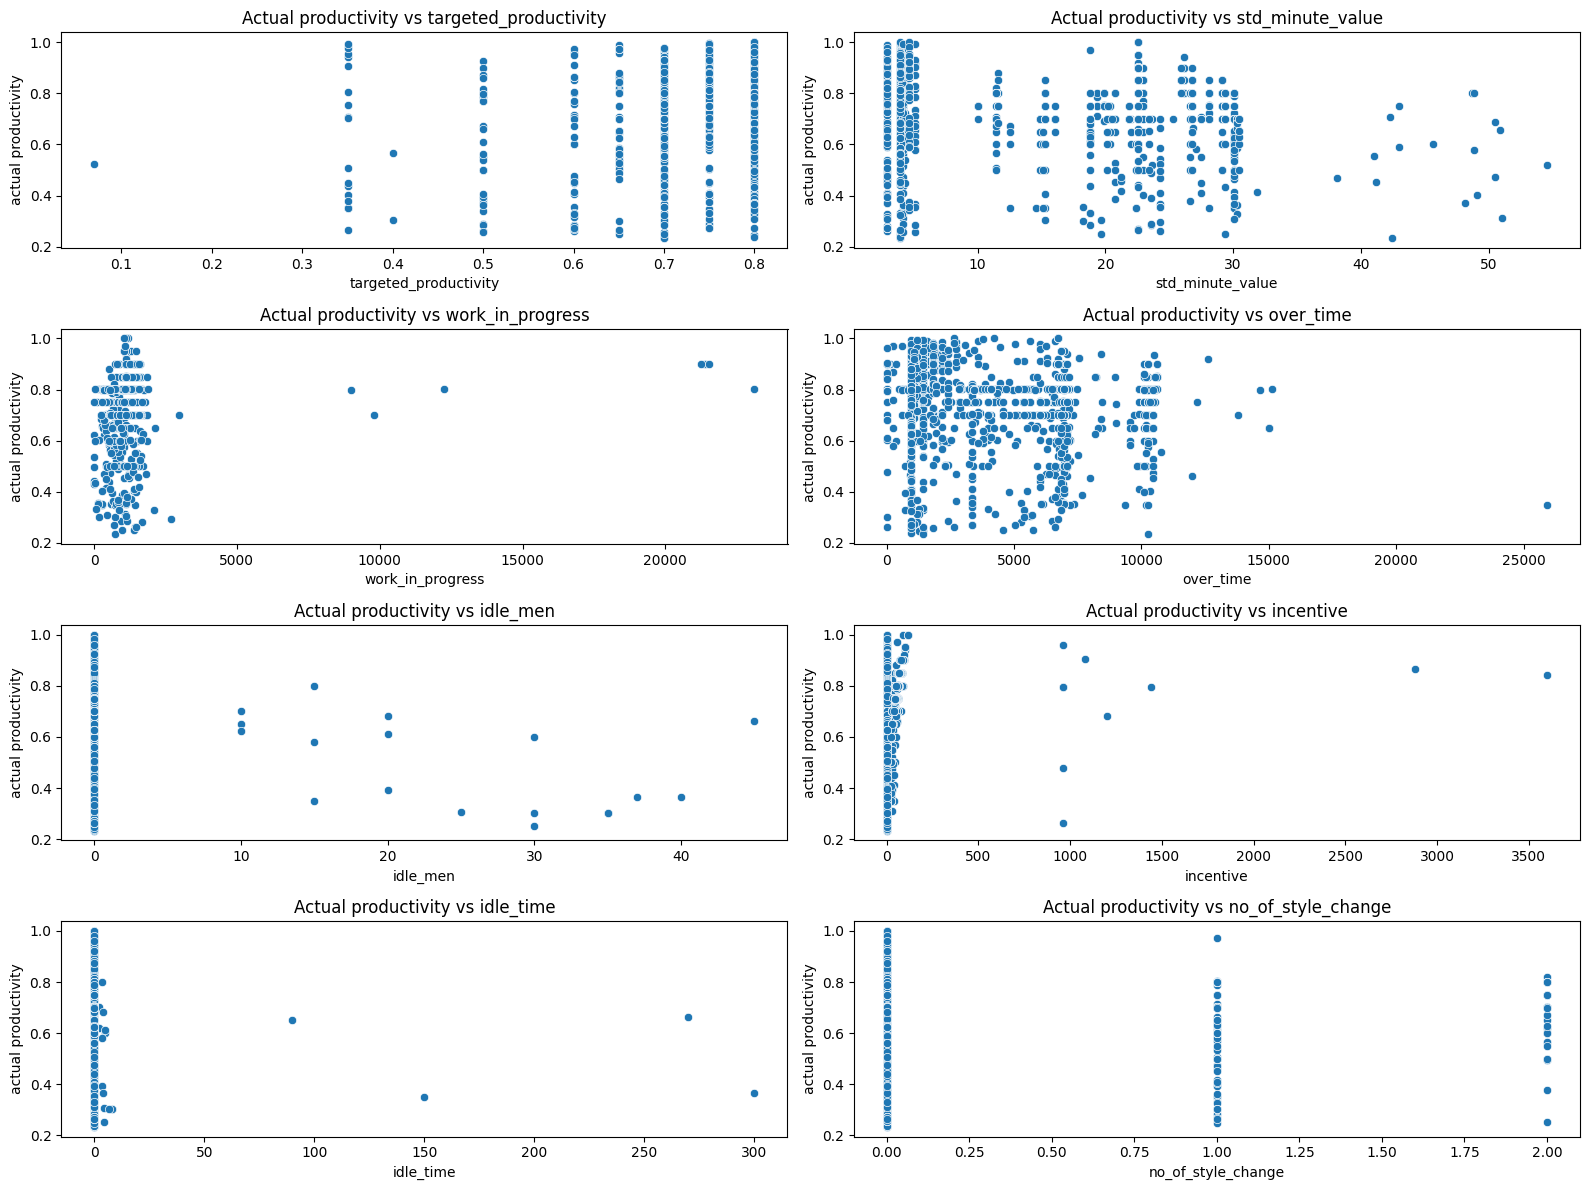

In [36]:
# Hubungan variabel numerik dan variabel target
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 12))

for i, ax in enumerate(axes.ravel()):
    if i < len(num_columns):
        sns.scatterplot(data=df_cleaned, x=num_columns[i], y='actual_productivity', ax=ax)
        ax.set_title(f"Actual productivity vs {num_columns[i]}")
        ax.set_xlabel(num_columns[i])
        ax.set_ylabel("actual productivity")
    else:
        fig.delaxes(ax)

fig.tight_layout()
plt.show()

1. Targeted Productivity: Tampak terdapat korelasi positif dengan produktivitas aktual, karena tingkat produktivitas yang ditargetkan lebih tinggi umumnya berhubungan dengan tingkat produktivitas aktual yang lebih tinggi.
2. Standard Minute Value: Terdapat kecenderungan produktivitas aktual menurun seiring dengan meningkatnya Standard Minute Value (SMV).
3. Work in Progress: Produktivitas aktual cenderung sedikit meningkat seiring dengan meningkatnya Pekerjaan dalam Proses (WIP).
4. Overtime: Ada sedikit kecenderungan produktivitas aktual menurun seiring dengan meningkatnya waktu lembur, namun hubungannya lemah.
5. Idle Men: Terdapat kecenderungan produktivitas aktual menurun seiring dengan meningkatnya jumlah pekerja yang menganggur.
6. Incentive: Ada sedikit kecenderungan produktivitas aktual meningkat seiring dengan peningkatan insentif, namun hubungannya lemah
7. Idle Time: Produktivitas aktual cenderung menurun seiring dengan meningkatnya waktu menganggur.
8. No of Style Change: Ketika jumlah perubahan desain produk meningkat, produktivitas aktual cenderung menurun.

In [37]:
# Melakukan encoding untuk kolom kategorikal
# drop kolom date
df_cleaned = df_cleaned.drop(columns=['date'])

from sklearn.preprocessing import LabelEncoder

df_encoded = df_cleaned.copy()
mappings = {}

for col in cat_columns:
    label_encoder = LabelEncoder()
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    mappings[col] = {index: label for index, label in enumerate(label_encoder.classes_)}

# cek mapping hasil encoding
for col, mapping in mappings.items():
    print(f'Kode untuk {col}:')
    print(mapping)
    print()

Kode untuk quarter:
{0: 'Quarter1', 1: 'Quarter2', 2: 'Quarter3', 3: 'Quarter4', 4: 'Quarter5'}

Kode untuk department:
{0: 'finishing', 1: 'sewing'}

Kode untuk day:
{0: 'Monday', 1: 'Saturday', 2: 'Sunday', 3: 'Thursday', 4: 'Tuesday', 5: 'Wednesday'}

Kode untuk team:
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12}



In [38]:
# cek hasil encoding
df_encoded.head()

,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,3,7,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,0,0,3,0,0.75,3.94,NaN,960,0,0.0,0,0,8,0.886500
2,0,1,3,10,0.80,11.41,968.0,3660,50,0.0,0,0,31,0.800570
3,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,31,0.800570
4,0,1,3,5,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


In [39]:
# Hitung korelasi antara variabel prediksi dan variabel target dalam DataFrame

correlation_matrix = df_encoded.corr()

target_correlation = correlation_matrix['actual_productivity']

sorted_correlation = target_correlation.sort_values(ascending=False)
print(sorted_correlation)


actual_productivity      1.000000
targeted_productivity    0.414307
work_in_progress         0.114506
incentive                0.068635
day                     -0.025497
over_time               -0.050351
quarter                 -0.053161
no_of_workers           -0.077989
idle_time               -0.081463
team                    -0.100026
department              -0.100442
std_minute_value        -0.133491
idle_men                -0.184021
no_of_style_change      -0.198167
Name: actual_productivity, dtype: float64


1. Variabel yang Berkorelasi Positif
- "targeted_productivity" memiliki korelasi positif sedang, yang berarti ketika produktivitas yang ditargetkan meningkat, produktivitas aktual juga cenderung meningkat.
- "work_in_progress" dan "incentive" memiliki hubungan positif yang sangat rendah dengan produktivitas.


2. Variabel yang Berkorelasi Negatif
- "no_of_style_change", "idle_men", "std_minute_value" memiliki korelasi negatif rendah, semakin banyak perubahan desain pada produk, pekerja yang idle, dan smv (banyaknya waktu yang dialokasikan untuk mengerjakan tugas) sedikit berpengaruh terhadap nilai produktivitas aktual yang rendah

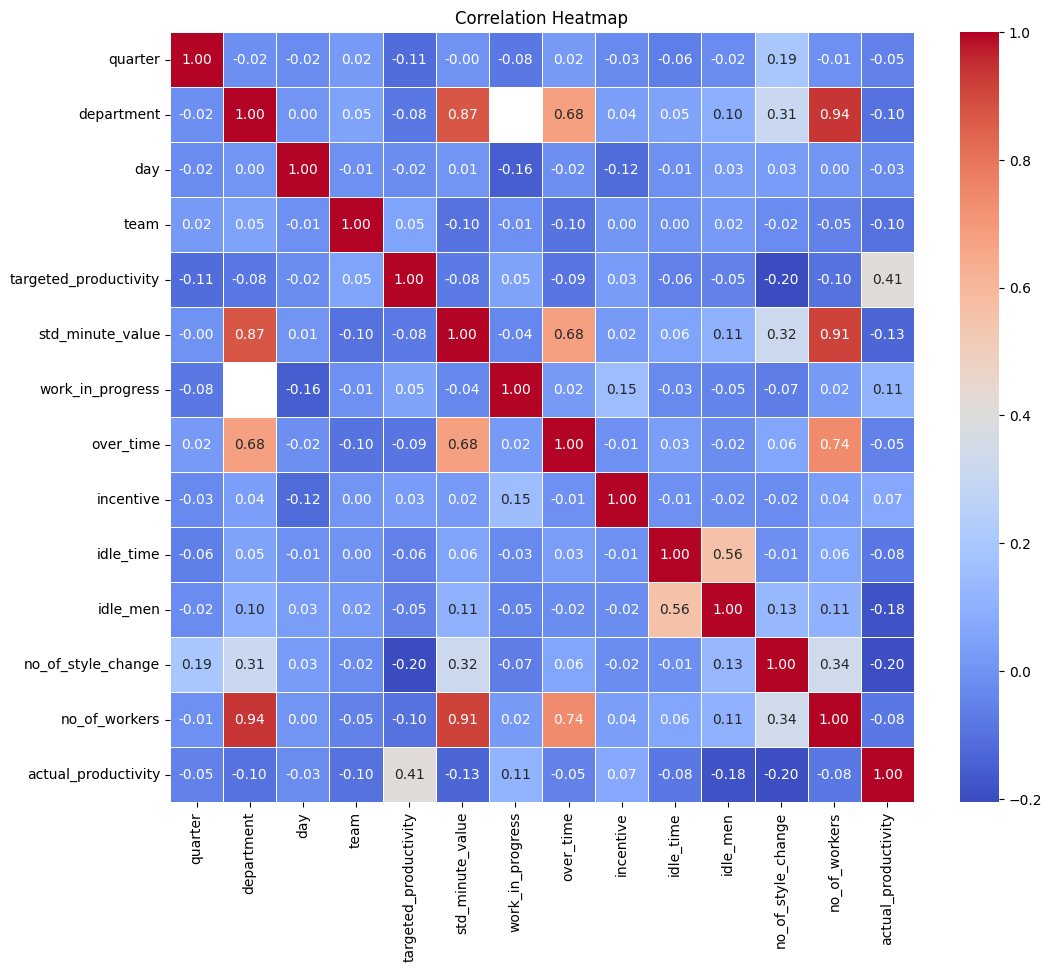

In [40]:
# korelasi menggunakan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

korelasi kuat antara variabel independen >= 0.5
- std_minute_value vs department = 0.87
- no_of_workers vs department = 0.94
- overtime vs department = 0.68
- std_minute_value vs no_of_workers = 0.91
- overtime vs no_of_workers = 0.74
- overtime vs std_minute_value = 0.68
- idle time vs idle man = 0.56

# Modeling

In [41]:
print(df_encoded.columns)

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity',
       'std_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')


Alasan penghapusan kolom 'work_in_progress':
1. Adanya banyak nilai null di kolom 'work_in_progress' dapat berdampak buruk pada performa model.
2. Kolom 'work_in_progress' memiliki dampak yang dapat diabaikan terhadap 'actual_productivity' berdasarkan koefisien korelasi (0.114506).

In [42]:
# Menghapus kolom work_in_progress
df_encoded = df_encoded.drop(columns=['work_in_progress'])

In [43]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['actual_productivity'])
y = df_encoded['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  928
Ukuran X test  232
Ukuran y train  928
Ukuran y test  232


In [45]:
from sklearn.preprocessing import StandardScaler

numeric_X_columns = ['targeted_productivity', 'incentive', 'over_time', 'no_of_workers', 'idle_time', 'std_minute_value', 'idle_men', 'no_of_style_change']
# scale data
scaler = StandardScaler()

# Fit dan transform hanya kolom numerik
X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_X_columns])
X_test_scaled_numeric = scaler.transform(X_test[numeric_X_columns])

# Ubah data numerik yang sudah discaling kembali ke DataFrame untuk digabungkan dengan data kategorikal
X_train_scaled_numeric_df = pd.DataFrame(X_train_scaled_numeric, columns=numeric_X_columns, index=X_train.index)
X_test_scaled_numeric_df = pd.DataFrame(X_test_scaled_numeric, columns=numeric_X_columns, index=X_test.index)

# Gabungkan kolom numerik yang sudah discaling dengan kolom kategorikal
X_train_scaled = pd.concat([X_train_scaled_numeric_df, X_train[cat_columns]], axis=1)
X_test_scaled = pd.concat([X_test_scaled_numeric_df, X_test[cat_columns]], axis=1)


In [46]:
X_train_scaled.columns

Index(['targeted_productivity', 'incentive', 'over_time', 'no_of_workers',
       'idle_time', 'std_minute_value', 'idle_men', 'no_of_style_change',
       'quarter', 'department', 'day', 'team'],
      dtype='object')

In [47]:
X_test_scaled.columns

Index(['targeted_productivity', 'incentive', 'over_time', 'no_of_workers',
       'idle_time', 'std_minute_value', 'idle_men', 'no_of_style_change',
       'quarter', 'department', 'day', 'team'],
      dtype='object')

## Linear Regression (Baseline Model)

In [48]:
# Linear Regression

linreg_model = LinearRegression()
linreg_model.fit(X_train_scaled, y_train)


LinearRegression()

In [49]:
linreg_pred = linreg_model.predict(X_test_scaled)

## Decision Tree Regressor

In [50]:
# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit model
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
dt_pred = dt_model.predict(X_test_scaled)

## Random Forest

In [52]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [53]:
# Predictions
rf_pred = rf_model.predict(X_test_scaled)

## SVM Regressor

In [54]:
# Initialize SVM Regressor
svr_model = SVR(kernel='rbf')

# Fit model
svr_model.fit(X_train_scaled, y_train)

SVR()

In [55]:
# Predictions
svr_pred = svr_model.predict(X_test_scaled)

## MLP Regressor

In [56]:
# Initialize MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Fit model
mlp_model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)

In [57]:
# Predictions
mlp_pred = mlp_model.predict(X_test_scaled)

## Hyperparameter Tuning

Dari evaluasi metrik di atas, model linear regression memiliki kinerja yang cukup baik dalam memprediksi variabel target (actual_productivity), dengan nilai kesalahan yang relatif rendah.

In [61]:
# Menentukan parameter grids untuk setiap model
linreg_param = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

dt_param = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

rf_param = {
    'n_estimators': randint(50, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

svr_param = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': uniform(loc=0, scale=10)
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': uniform(loc=0.0001, scale=0.1)
}


In [63]:
# Persiapkan model dan parameters
models_hp = {
    'Linear Regression': linreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVR': svr_model,
    'MLP': mlp_model
}

models_params = {
    'Linear Regression': linreg_param,
    'Decision Tree': dt_param,
    'Random Forest': rf_param,
    'SVR': svr_param,
    'MLP': mlp_param_grid
}

In [65]:
models_tuned = {}
for name, model in models_hp.items():
    print(f"Running RandomizedSearchCV for {name}...")
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=models_params[name],
        scoring='neg_mean_squared_error',
        n_iter=50,
        cv=5,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train_scaled, y_train)

    print(f"Best Parameters for {name}:")
    print(search.best_params_)

    models_tuned[name] = search.best_estimator_ # Simpan model best estimator

Running RandomizedSearchCV for Linear Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Linear Regression:
{'positive': False, 'fit_intercept': True}
Running RandomizedSearchCV for Decision Tree...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for Decision Tree:
{'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 14}
Running RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for Random Forest:
{'max_depth': 23, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 191}
Running RandomizedSearchCV for SVR...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for SVR:
{'C': 1.987156815341724, 'kernel': 'rbf'}
Running RandomizedSearchCV for MLP...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for MLP:
{'activation': 'tanh', 'alpha': 0.057144397440539944, 'hidden_layer_sizes': (100, 50)}


In [66]:
for name, model in models_tuned.items():
    print(f"Best Estimator for {name}:")
    print(model)
    print("\n")

Best Estimator for Linear Regression:
LinearRegression()


Best Estimator for Decision Tree:
DecisionTreeRegressor(max_depth=11, min_samples_leaf=4, min_samples_split=14,
                      random_state=42)


Best Estimator for Random Forest:
RandomForestRegressor(max_depth=23, max_features='log2', min_samples_split=6,
                      n_estimators=191, random_state=42)


Best Estimator for SVR:
SVR(C=1.987156815341724)


Best Estimator for MLP:
MLPRegressor(activation='tanh', alpha=0.057144397440539944,
             hidden_layer_sizes=(100, 50), random_state=42)




## Evaluasi Model

In [76]:
# Definisi fungsi perhitungan SMAPE
def calculate_smape(actual, predicted):
    # Calculate absolute difference and sum of absolute values
    absolute_diff = np.abs(actual - predicted)
    sum_absolute = np.abs(actual) + np.abs(predicted)

    # Avoid division by zero
    mask = sum_absolute != 0

    # Calculate SMAPE
    smape = np.mean(200 * (absolute_diff[mask] / sum_absolute[mask]))

    return smape

In [79]:
# Evaluasi model tanpa hyperparameter tuning
# List model
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'MLP']
predictions_no_tuning = [linreg_pred, dt_pred, rf_pred, svr_pred, mlp_pred]

results_no_tuning = {
    'Model': models,
    'MSE': [],
    'RMSE': [],
    'SMAPE': []
}

for pred in predictions_no_tuning:
    mse = metrics.mean_squared_error(y_test, pred) # hitung mse
    rmse = np.sqrt(mse) # hitung rmse
    smape = calculate_smape(y_test, pred) # hitung SMAPE

    results_no_tuning['MSE'].append(mse)
    results_no_tuning['RMSE'].append(rmse)
    results_no_tuning['SMAPE'].append(smape)

results_no_tuning_df = pd.DataFrame(results_no_tuning)

results_no_tuning_df

,Model,MSE,RMSE,SMAPE
0,Linear Regression,0.019997,0.141409,15.869855
1,Decision Tree,0.022715,0.150715,13.737591
2,Random Forest,0.012038,0.109717,11.066572
3,SVR,0.017584,0.132606,14.711824
4,MLP,0.021146,0.145418,15.857822


Random Forest adalah model terbaik sebelum dilakukan hyperparameter tuning dengan nilai:
1. MSE: 0.012038
2. RMSE: 0.109717
3. SMAPE: 11.066572

In [80]:
# Evaluasi model dengan hyperparameter tuning
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test) # prediksi
    mse = metrics.mean_squared_error(y_test, y_pred) # hitung mse
    rmse = np.sqrt(mse) # hitung rmse
    smape = calculate_smape(y_test, y_pred) # hitung SMAPE
    return mse, rmse, smape

results_tuned = {
    'Model': models,
    'MSE': [],
    'RMSE': [],
    'SMAPE': []
}

for name in models:
    model = models_tuned[name]
    mse, rmse, smape = evaluate_model(model, X_test_scaled, y_test) # evaluasi model
    results_tuned['MSE'].append(mse)
    results_tuned['RMSE'].append(rmse)
    results_tuned['SMAPE'].append(smape)

# Hasil evaluasi dari model yang telah dituning
results_tuned_df = pd.DataFrame(results_tuned)
results_tuned_df


,Model,MSE,RMSE,SMAPE
0,Linear Regression,0.019997,0.141409,15.869855
1,Decision Tree,0.017176,0.131059,12.795391
2,Random Forest,0.011586,0.107636,11.478690
3,SVR,0.016579,0.128758,14.396731
4,MLP,0.018466,0.135890,14.409161


Hyperparameter tuning pada model Random Forest menghasilkan model dengan performa yang lebih baik dalam nilai MSE dan RMSE. Meskipun ada sedikit peningkatan dalam SMAPE, peningkatan ini tidak signifikan bila dibandingkan dengan keuntungan dalam pengurangan kesalahan kuadrat.

Random Forest
1. MSE: 0.011586
2. RMSE: 0.107636
3. SMAPE: 11.478690

# Rekomendasi

Random Forest (Dengan Hyperparameter Tuning) adalah model terbaik yang direkomendasikan untuk digunakan dalam memprediksi produktivitas aktual buruh di industri garmen ini berdasarkan hasil evaluasi performa model yang dilakukan.